In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, metrics, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

from scikitplot.metrics import plot_confusion_matrix

In [2]:
%run dataManagementPart2.ipynb

In [3]:

file2 = open('./Data/radiomics_features_set2.csv','r')

data = read1CSV(file2)

In [4]:
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
            ID  original_shape2D_Elongation  original_shape2D_MajorAxisLength  \
0    BMC1_44_1                     0.574819                        174.159951   
1    BMC1_65_5                     0.788639                        314.163173   
2    BMC1_36_2                     0.602857                        275.877792   
3    BMC1_34_3                     0.844939                         69.839036   
4    BMC3_39_7                     0.802258                         78.611913   
..         ...                          ...                               ...   
531  BMC1_37_3                     0.690266                        170.824530   
532  BMC1_50_8                     0.454197                        288.370047   
533  FMC2_88_1                     0.554397                        304.291706   
534  FMC1_64_2                     0.377563                        444.351320   
535  FMC2_84_2                     0.594852                        557.

In [5]:
label_set=set()
for label in data.loc[:, 'ID']:
    if label not in label_set :
        if (label[0:4] not in label_set) and (label[0:2]=='FM') :
            label_set.add(label[0:4])
print(label_set)
print("nb labels : ",len(label_set))

{'FMC1', 'FMC2'}
nb labels :  2


In [6]:
y_B, y_F = getLabels(data)
X_B,X_F = getData(data)

scaler = MinMaxScaler()
X_F = scaler.fit_transform(X_F)

print(np.max(X_F))

#X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(X_F,y_F)

(206, 102) (37, 102) (16, 102)
1.0000000000000002


### TSNE

In [7]:
X_F_emb = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=4).fit_transform(X_F)
X_F_emb = scaler.fit_transform(X_F_emb)
print(X_F_emb.shape)


couleur=[]

print(y_F[0])
for lebel in y_F :
    if lebel== 1: 
        couleur.append('blue')
    else:
        couleur.append('red')
        



(277, 2)
1


In [8]:
col = ['dim1','dim2']
X_tsne=pd.DataFrame(X_F_emb,columns=col)
X_tsne.head()

,dim1,dim2
0,0.508373,0.676073
1,0.493172,0.216260
2,0.368627,0.946039
3,0.566465,0.776915
4,0.590895,0.000000


<AxesSubplot:xlabel='dim1', ylabel='dim2'>

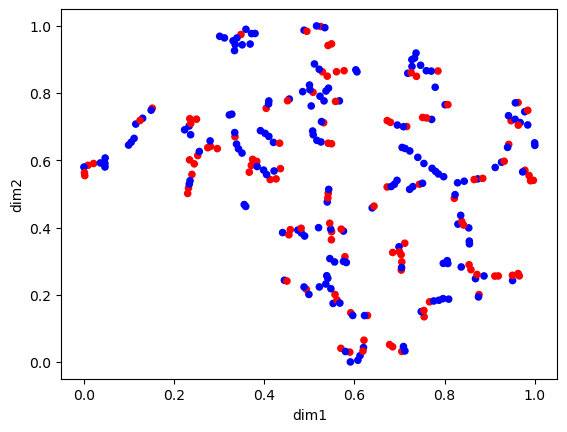

In [9]:
X_tsne.plot(x='dim1', y='dim2', kind='scatter',color=couleur)

### PCA

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=102) #creating a PCA for a test (we have 102 features)
pca.fit(X_F)

variance = pca.explained_variance_ratio_ #calculate variance ratios 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([31.8, 55.6, 72.3, 80.4, 85.7, 88.6, 90.7, 92.2, 93.4, 94.4, 95.2,
       95.8, 96.4, 96.9, 97.3, 97.6, 97.9, 98.1, 98.3, 98.5, 98.7, 98.8,
       98.9, 99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6])

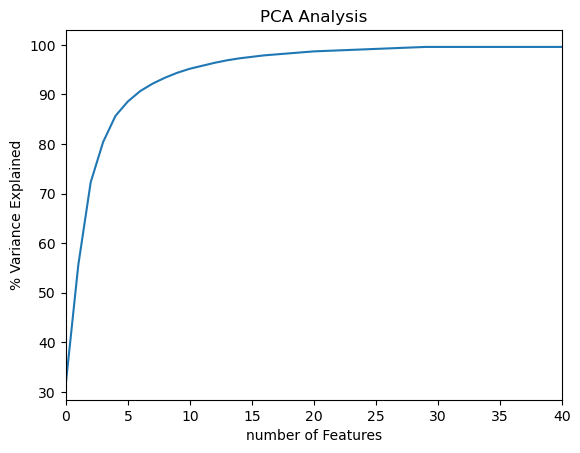

In [11]:
plt.ylabel('% Variance Explained')
plt.xlabel('number of Features')
plt.title('PCA Analysis')
plt.xlim(0,40)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [12]:
pca2 = PCA(n_components=10) #creating the PCA 
pca2.fit(X_F)

pca2c = PCA(n_components=2) #creating the PCA 
pca2c.fit(X_F)

X_F_pca = pca2.transform(X_F)
X_F_pca = scaler.fit_transform(X_F_pca)
print(X_F_pca.shape)

X_F_pca2c = pca2c.transform(X_F)
X_F_pca2c = scaler.fit_transform(X_F_pca2c)
print(X_F_pca2c.shape)

col = ['dim1','dim2','dim3']
X_pca=pd.DataFrame(X_F_pca[:,0:3],columns=col)
X_pca.head()


col = ['dim1','dim2']
X_pca2c=pd.DataFrame(X_F_pca2c[:,0:2],columns=col)
X_pca2c.head()

(277, 10)
(277, 2)


,dim1,dim2
0,0.476416,0.389363
1,0.328290,0.327777
2,0.711809,0.288091
3,0.625975,0.319000
4,0.378788,0.693190


<AxesSubplot:xlabel='dim1', ylabel='dim2'>

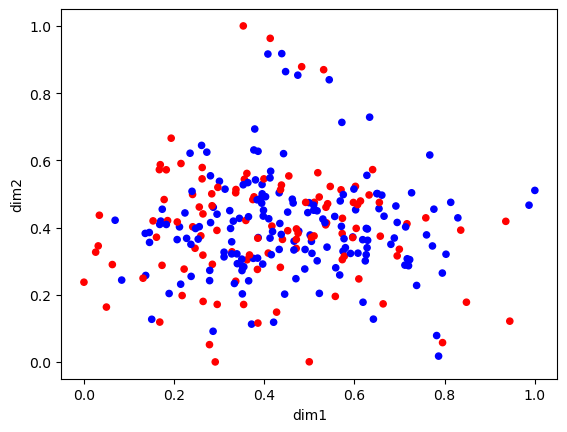

In [13]:
X_pca2c.plot(x='dim1', y='dim2', kind='scatter',color=couleur)

(277, 3)


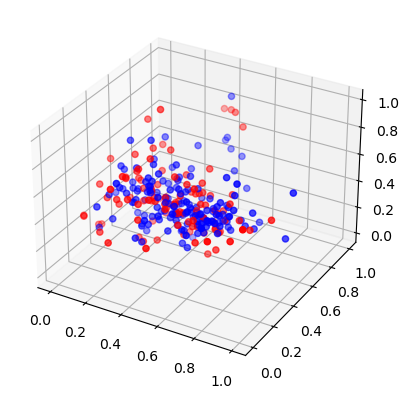

In [14]:
#frommpl_toolkits.mplot3d import Axes3D

pca3c = PCA(n_components=3) #creating the PCA 
pca3c.fit(X_F)


X_F_pca3c = pca3c.transform(X_F)
X_F_pca3c = scaler.fit_transform(X_F_pca3c)
print(X_F_pca3c.shape)

fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(X_pca['dim1'],X_pca['dim2'],X_pca['dim3'],facecolor=couleur)

col = ['dim1','dim2','dim3']
X_pca3c=pd.DataFrame(X_F_pca3c[:,0:3],columns=col)
X_pca3c.head()

plt.show()

## hierarchical classification

res without pca: 0.7183022567450896


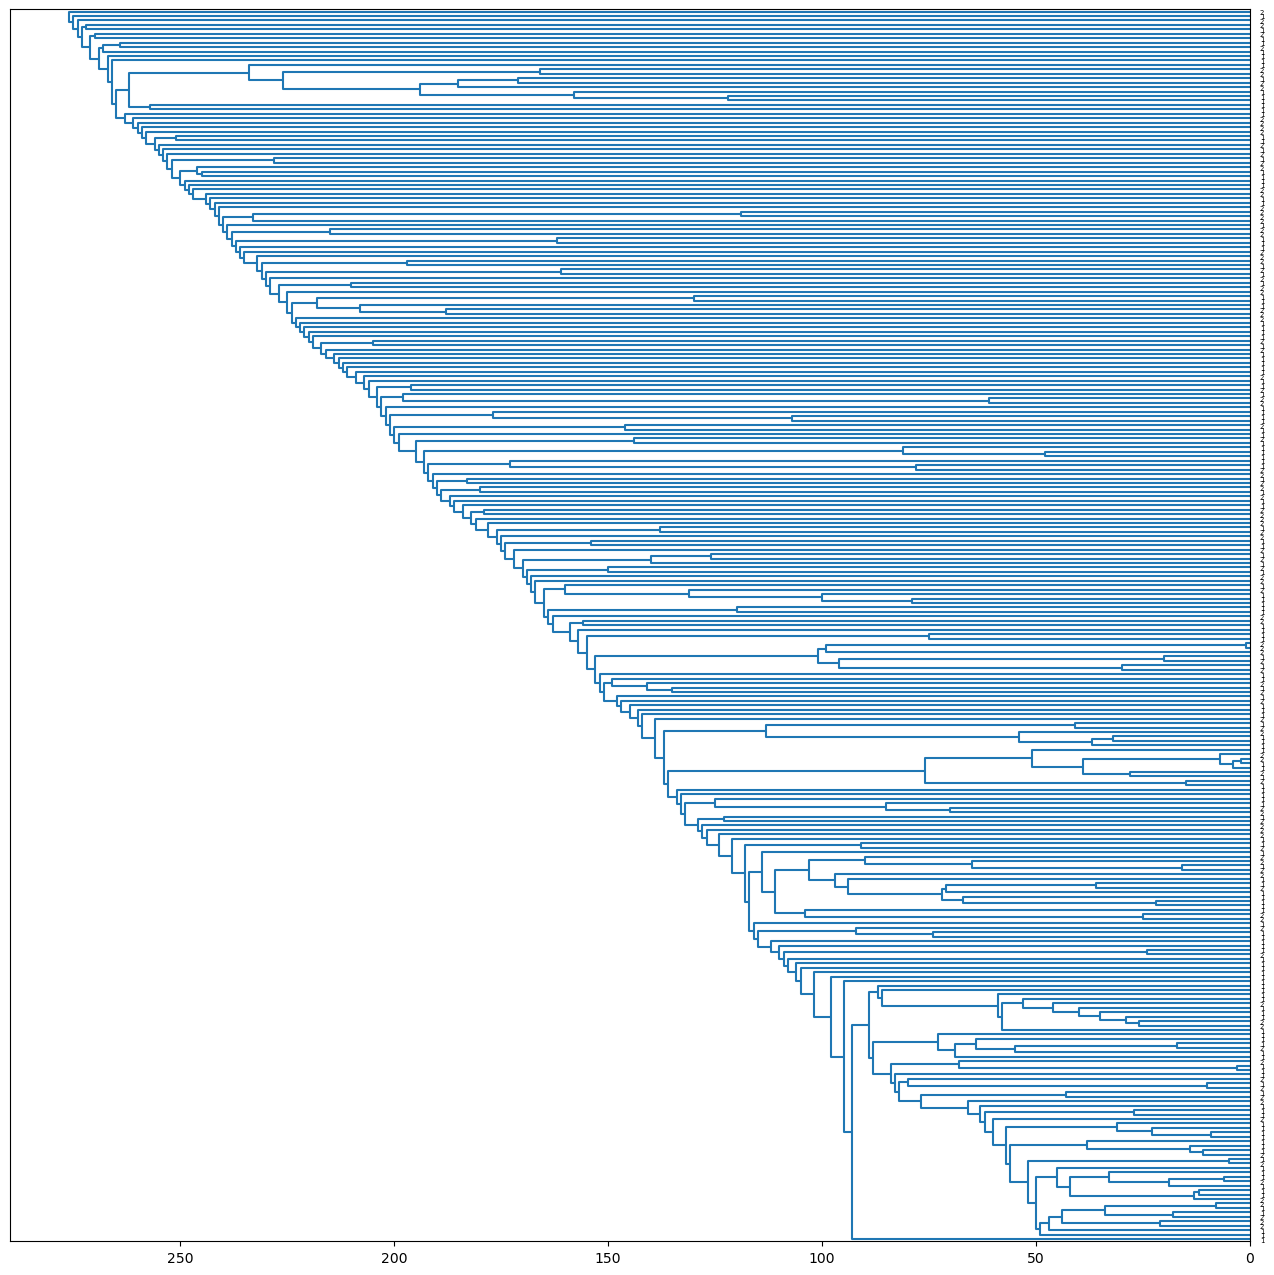

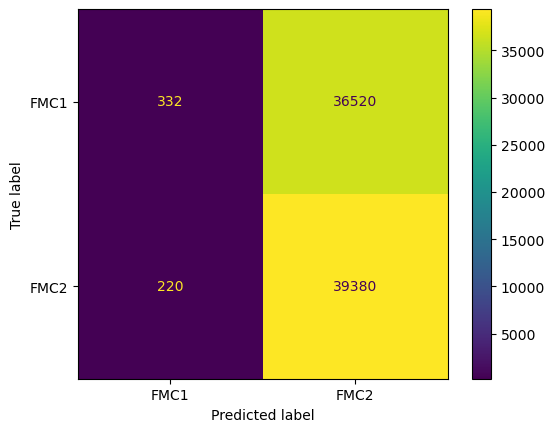

In [15]:
#without PCA
from sklearn.cluster import AgglomerativeClustering

HierClust = AgglomerativeClustering(n_clusters=2, linkage='single', compute_full_tree=True).fit(X_F)#we can change the linkage criterion
#linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, i don t know which is the best for our dataset

HierClust_labels = AgglomerativeClustering(n_clusters=2, linkage='single', compute_full_tree=True).fit_predict(X_F)

AgglomerativeClustering(compute_full_tree=True)

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

dendro = [ ]
for a,b in HierClust.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])
    # the last coefficient should contain the number of leaves depending on this node
    # not the last index
    # likewise, the level (3rd column) should not be the number of nodes
    # but Ward's distance

fig = plt.figure( figsize=(16,16) )
ax = fig.add_subplot(1,1,1)
r = dendrogram(dendro, color_threshold=1, labels=list(y_F),
               show_leaf_counts=True, ax=ax, orientation="left")

resultat=fowlkes_mallows_score(y_F,HierClust_labels)
print('res without pca:',resultat)

cm=pair_confusion_matrix(y_F,HierClust_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=['FMC1','FMC2'])
cmd.plot()



res with pca: 0.7183022567450896


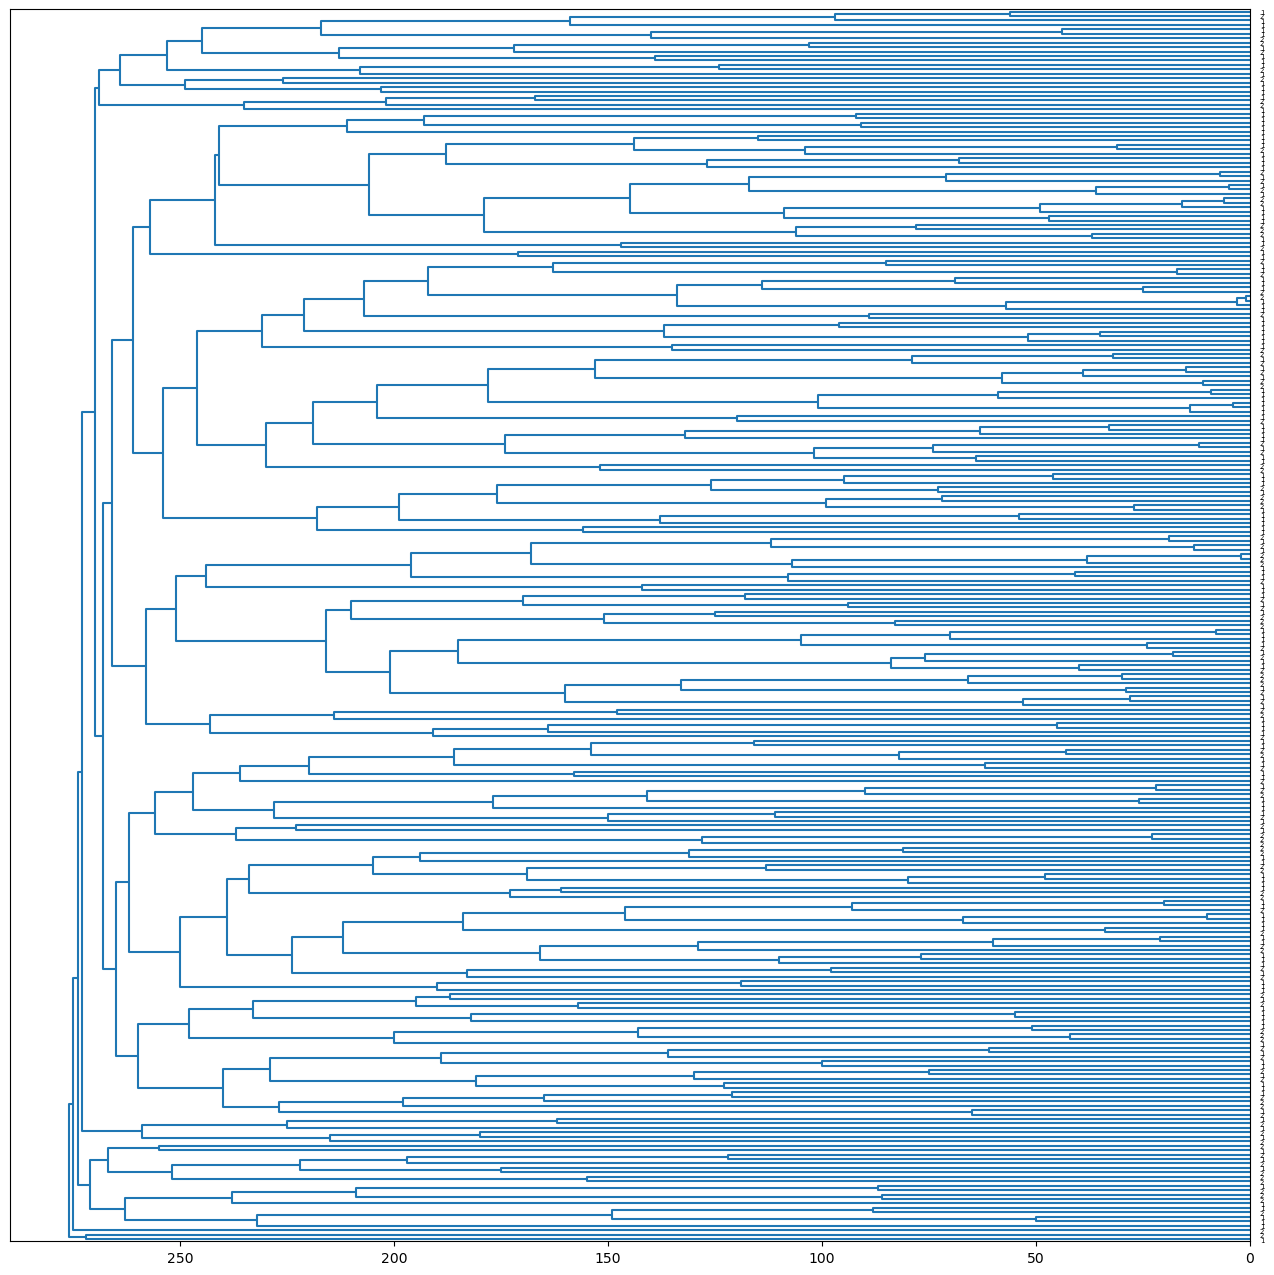

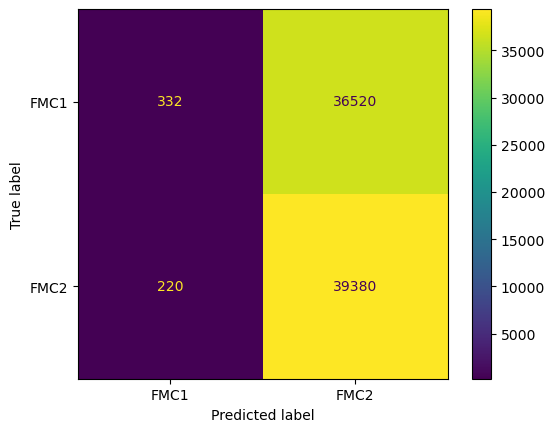

In [16]:
#with PCA
from sklearn.cluster import AgglomerativeClustering

HierClust = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_full_tree=True).fit(X_F_pca)
#linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, i don t know which is the best for our dataset

HierClust_labels = AgglomerativeClustering(n_clusters=2, linkage='single', compute_full_tree=True).fit_predict(X_F_pca)

AgglomerativeClustering(compute_full_tree=True)

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

dendro = [ ]
for a,b in HierClust.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])
    # the last coefficient should contain the number of leaves depending on this node
    # not the last index
    # likewise, the level (3rd column) should not be the number of nodes
    # but Ward's distance

fig = plt.figure( figsize=(16,16) )
ax = fig.add_subplot(1,1,1)
r = dendrogram(dendro, color_threshold=1, labels=list(y_F),
               show_leaf_counts=True, ax=ax, orientation="left")
                                                                                                                
resultat=fowlkes_mallows_score(y_F,HierClust_labels)
print('res with pca:',resultat)

cm=pair_confusion_matrix(y_F,HierClust_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=['FMC1','FMC2'])
cmd.plot()


res with tsne: 0.5149956755956295


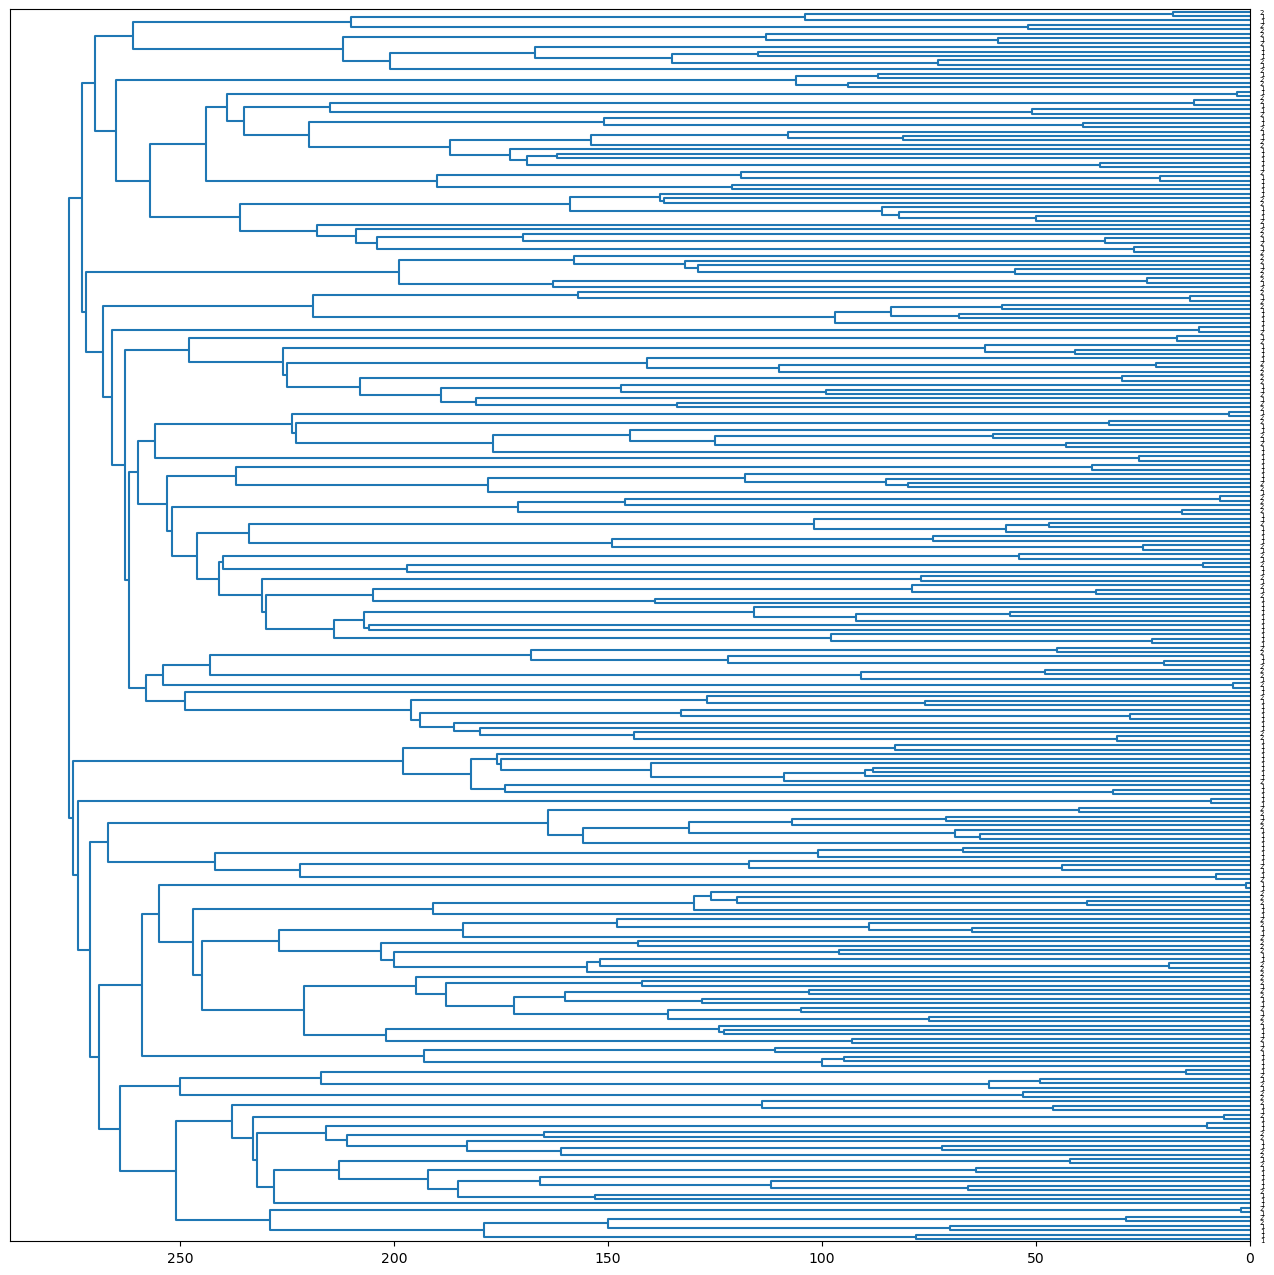

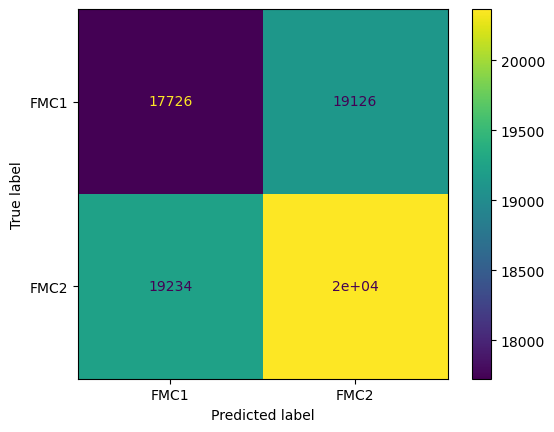

In [17]:
#with TSNE
from sklearn.cluster import AgglomerativeClustering

HierClust = AgglomerativeClustering(n_clusters=2, linkage='single', compute_full_tree=True).fit(X_tsne)
#linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, i don t know which is the best for ou dataset
HierClust_labels = AgglomerativeClustering(n_clusters=2, linkage='single', compute_full_tree=True).fit_predict(X_tsne)

AgglomerativeClustering(compute_full_tree=True)

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

dendro = [ ]
for a,b in HierClust.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])
    # the last coefficient should contain the number of leaves depending on this node
    # not the last index
    # likewise, the level (3rd column) should not be the number of nodes
    # but Ward's distance

fig = plt.figure( figsize=(16,16) )
ax = fig.add_subplot(1,1,1)
r = dendrogram(dendro, color_threshold=1, labels=list(y_F),
               show_leaf_counts=True, ax=ax, orientation="left")

resultat=fowlkes_mallows_score(y_F,HierClust_labels)
print('res with tsne:',resultat) 

cm=pair_confusion_matrix(y_F,HierClust_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=['FMC1','FMC2'])
cmd.plot()


### clustering spectral classification

In [18]:
#without PCA


clustering1 = SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0).fit_predict(X_F)

#with pca
clustering2 = SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0).fit_predict(X_F_pca)

#with tsne
clustering3 = SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0).fit_predict(X_tsne)






res without pca: 0.6972406958481527
res with pca: 0.5082499583137511
res with tsne : 0.5066779389044591


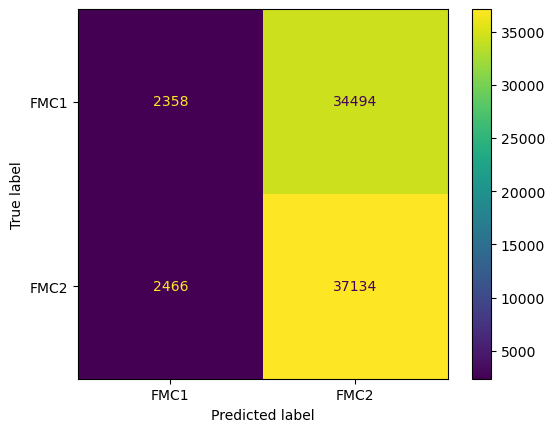

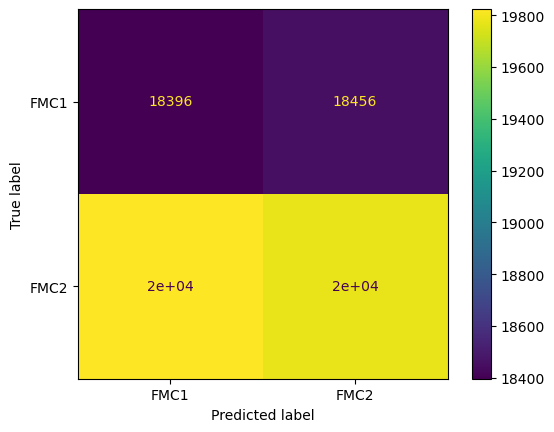

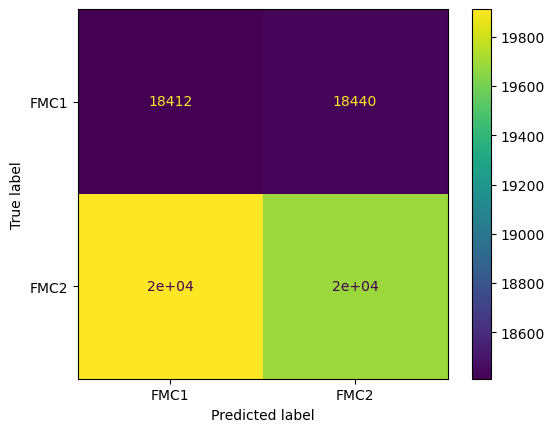

In [19]:






# evaluation for spectral clustering 
resultat1=fowlkes_mallows_score(y_F,clustering1) #with y_F true labels 
resultat2=fowlkes_mallows_score(y_F,clustering2)
resultat3=fowlkes_mallows_score(y_F,clustering3)
print('res without pca:',resultat1)

print('res with pca:',resultat2)

print('res with tsne :',resultat3)

#pair confusion matrix without pca
cm1=pair_confusion_matrix(y_F,clustering1)
cmd1 = ConfusionMatrixDisplay(cm1, display_labels=['FMC1','FMC2'])
cmd1.plot()

#pair confusion matrix with pca
cm2=pair_confusion_matrix(y_F,clustering2)
cmd2 = ConfusionMatrixDisplay(cm2, display_labels=['FMC1','FMC2'])
cmd2.plot()

#pair confusion matrix with TSNE
cm3=pair_confusion_matrix(y_F,clustering3)
cmd3 = ConfusionMatrixDisplay(cm3, display_labels=['FMC1','FMC2'])
cmd3.plot()


### K-means

In [20]:
from sklearn.cluster import KMeans
#without PCA

kmeans1=KMeans(n_clusters=2).fit_predict(X_F)

#with pca
kmeans2=KMeans(n_clusters=2).fit_predict(X_F_pca)

#with tsne
kmeans3=KMeans(n_clusters=2).fit_predict(X_tsne)

res without pca: 0.5116324257147002
res with pca: 0.5138661644154653
res with tsne : 0.5066779389044591


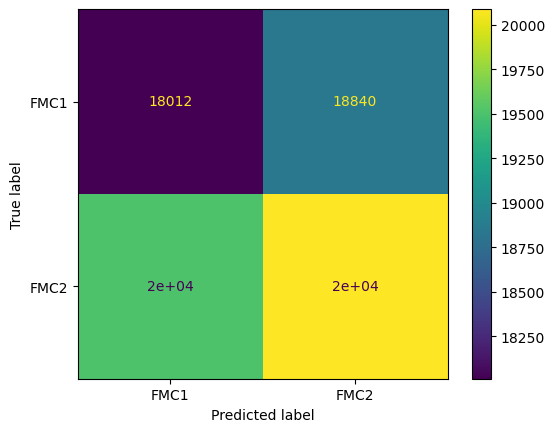

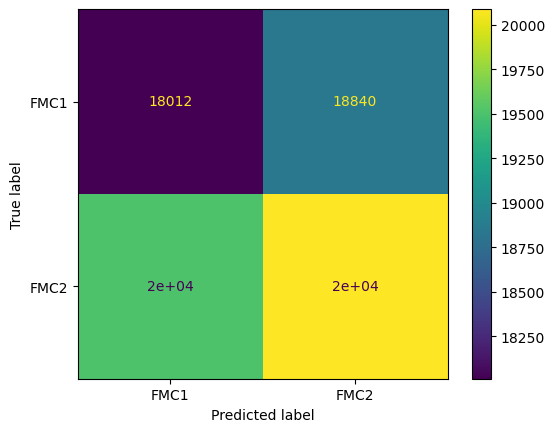

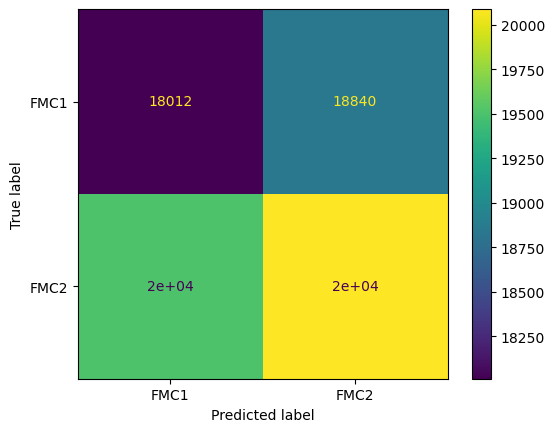

In [21]:
# evaluation for spectral clustering 
resultat1=fowlkes_mallows_score(y_F,kmeans1) #with y_F true labels 
resultat2=fowlkes_mallows_score(y_F,kmeans2)
resultat3=fowlkes_mallows_score(y_F,kmeans3)
print('res without pca:',resultat1)

print('res with pca:',resultat2)

print('res with tsne :',resultat3)

#pair confusion matrix without pca
cm1=pair_confusion_matrix(y_F,kmeans1)
cmd1 = ConfusionMatrixDisplay(cm1, display_labels=['FMC1','FMC2'])
cmd1.plot()

#pair confusion matrix with pca
cm2=pair_confusion_matrix(y_F,kmeans1)
cmd2 = ConfusionMatrixDisplay(cm2, display_labels=['FMC1','FMC2'])
cmd2.plot()

#pair confusion matrix with TSNE
cm3=pair_confusion_matrix(y_F,kmeans1)
cmd3 = ConfusionMatrixDisplay(cm3, display_labels=['FMC1','FMC2'])
cmd3.plot()

